# Forward and Back Fourier Transforms

The next few cells are mainly to test the validity of the computation method. In the first cell, the wake pattern is inverse Fourier transformed back and compared to the source term in k-space. In the second cell, a function whose Fourier transform can be expressed analytically is considered. Specifically, this is the response to a source set a distance above the x-y plane. The function n(r) and it's Fourier Transform n(q) are compared to F^(-1)[n(q)] and F[n(r)] respectively, to ensure the method works.

In [1]:
from challenging_kelvin import calculate_wake, phi_in, phi_in2
import matplotlib.pyplot as plt
import numpy as np
import cPickle
plt.rcParams['image.cmap'] = 'jet'

In [2]:
delta = 0.03125
lambd = 0.002
kmaxs = [1, 1 + 2 * delta, 1 + 4 * delta, 1 + 6 * delta, 1.25, 1.5, 1.75, 2, 4, 8, 16, 32, 64]
delts = np.ones(len(kmaxs)) * delta
bounds = [100, 100, 100, 100, 100, 100, 100, 100, 4, 2.5, 1.5, 1, 1]

def generate_wake_patterns(kmax, dval):
    phis = []
    xs = []
    for km, dv in zip(kmax, dval):
        x, p = calculate_wake(lambd, km, dv, 1)
        xs.append(x)
        phis.append(np.real(p))
        print('kmax=%f done' % km)
    return xs, phis

In [3]:
#pickleFile = '123wake_patterns.pickle'
picklFile = 'abcde.pickle'
try:
    with open(pickleFile, 'r') as f:
        phis, xvals, kmaxs, delts, bounds = cPickle.load(f)
    print('Loaded from Pickle')
except:
    print('Generating wake patterns')
    xvals, phis = generate_wake_patterns(kmaxs, delts)
    #with open(pickleFile, 'w') as f:
    #    cPickle.dump([phis, xvals, kmaxs, delts, bounds], f)
    print('Saved as pickle')
        
#The plot range for all plots, in case the resolution is different
rpl = xvals[-1][-1]

Generating wake patterns
kmax=1.000000 done
kmax=1.062500 done
kmax=1.125000 done
kmax=1.187500 done
kmax=1.250000 done
kmax=1.500000 done
kmax=1.750000 done
kmax=2.000000 done
kmax=4.000000 done
kmax=8.000000 done
kmax=16.000000 done
kmax=32.000000 done
kmax=64.000000 done
Saved as pickle


((146.27753819360032+123.20709718375784j), (-162.56595547678924-141.95336102606799j))


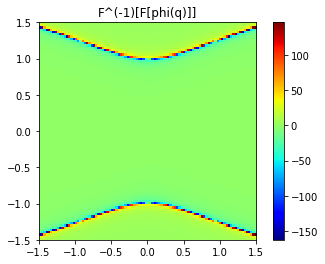

((146.27753819363446+123.20709718396068j), (-162.5659554767532-141.95336102581055j))


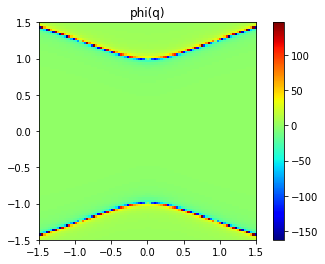

In [4]:
#Reverse fourier transform
ind = 5 #kmax = 4
phii = phis[ind]
xi = xvals[ind]
dk = delts[ind]
n = len(xi)
m = (n-1) / 2
dx = xi[-1] - xi[-2]
ks = np.pi / (dx * m) * np.arange(-m, m+1, 1)
n += 1
phi_grid = np.roll(phii, -m, axis=0)
phi_grid = np.roll(phi_grid, -m, axis=1)
fPhi = np.fft.fft2(phi_grid / (dk * dk))
fPhi = np.roll(fPhi, m, axis=1)
fPhi = np.roll(fPhi, m, axis=0)
fPhi = np.transpose(fPhi)

plt.figure()
ri = ks[-1]
print(np.max(fPhi), np.min(fPhi))
plt.title('F^(-1)[F[phi(q)]]')
plt.imshow(np.real(fPhi), extent=[-ri, ri, -ri, ri])
plt.colorbar()
plt.show()

plt.figure()
phi2 = phi_in2(ks[:, None], ks[None, :], lambd)
plt.title('phi(q)')
print(np.max(phi2), np.min(phi2))
plt.imshow(np.real(phi2), extent=[-ri, ri, -ri, ri])
plt.colorbar()
plt.show()

(2099200, 0)
(2100224, 4202499)


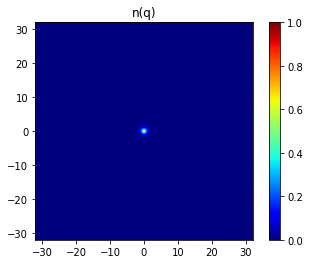

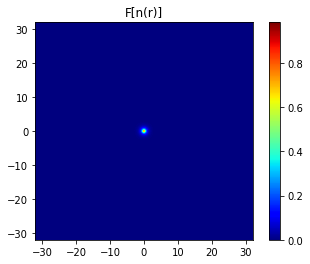

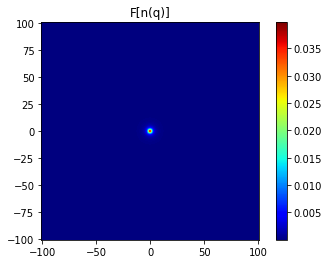

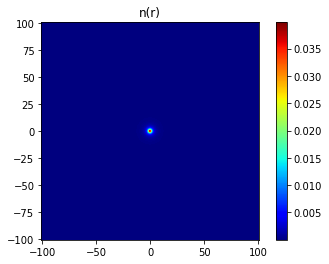

In [5]:
def nextr(r, a=2.0):
    return a / (2 * np.pi * np.power(r**2.0 + a**2.0, 1.5))

def nextq(q, a=2.0):
    return np.exp(-q * a)

def phiin(kx, ky, l, func=nextr):
    k = np.sqrt(kx*kx + ky*ky)
    return func(k)

ind = -2
R = kmaxs[ind]
d = delts[ind]
k = np.arange(-R, R+d, d)
n = len(k)
m = (n - 1) / 2
x = np.pi / (d * m) * np.arange(-m, m+2, 1)
phi_q = phiin(k[:,None], k[None,:], lambd, func=nextq)
phi_r = phiin(x[:,None], x[None,:], lambd, func=nextr)

dx = x[-1] - x[-2]
dk = k[-1] - k[-2]

print(np.argmax(phi_q), np.argmin(phi_q))
print(np.argmax(phi_r), np.argmin(phi_r))

phi_qgrid = np.roll(phi_q, -m, axis=0)
phi_qgrid = np.roll(phi_qgrid, -m, axis=1)
fPhiq = np.fft.ifft2(phi_qgrid) / (dx * dx)
fPhiq = np.roll(fPhiq, m, axis=1)
fPhiq = np.roll(fPhiq, m, axis=0)
fPhiq = np.transpose(fPhiq)

phi_rgrid = np.roll(phi_r, -m, axis=0)
phi_rgrid = np.roll(phi_rgrid, -m, axis=1)
fPhir = np.fft.fft2(phi_rgrid) * dx * dx
fPhir = np.roll(fPhir, m, axis=1)
fPhir = np.roll(fPhir, m, axis=0)
fPhir = np.transpose(fPhir)

x0 = x[-1]
k0 = k[-1]
plt.figure()
plt.title('n(q)')
plt.imshow(np.real(phi_q), extent=[-k0, k0, -k0, k0])
plt.colorbar()
plt.figure()
plt.title('F[n(r)]')
plt.imshow(np.real(fPhir), extent=[-k0, k0, -k0, k0])
plt.colorbar()
plt.figure()
plt.title('F[n(q)]')
plt.imshow(np.real(fPhiq), extent=[-x0, x0, -x0, x0])
plt.colorbar()
plt.figure()
plt.title('n(r)')
plt.imshow(np.real(phi_r), extent=[-x0, x0, -x0, x0])
plt.colorbar()

plt.show()